In [36]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the Data 
**Importing python libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading the dataset**

In [38]:
ComputerPrice=pd.read_csv("R:\DS\Ivy\Python\Python Datasets\Regression Datasets\ComputerPricesData.csv")
print('Shape before deleting duplicate values:', ComputerPrice.shape)

Shape before deleting duplicate values: (6259, 10)


**Removing duplicate values**

In [39]:
ComputerPrice=ComputerPrice.drop_duplicates()
print('Shape before deleting duplicate values:', ComputerPrice.shape)

Shape before deleting duplicate values: (6183, 10)


# Basic Data Exploration

In [40]:
ComputerPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


In [41]:
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [42]:
#Checking for null values
ComputerPrice.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [43]:
ComputerPrice.describe(include='all')

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183,6183,6183,6183.000000,6183.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3314,5325,5573,NaN,NaN
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,NaN,NaN,NaN,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,NaN,NaN,NaN,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,22.000000


# Defining the problem statement: 
#### Predict the appropriate value of a computer based on its characteristics
* Target Variable: price
* Predictors: speed,hd,ram,screen,cd,multi,ads,premium,trend

# Determining the type of Machine Learning Algorithm
Based on the problem statement we need to create a **supervised ML Regression model**, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

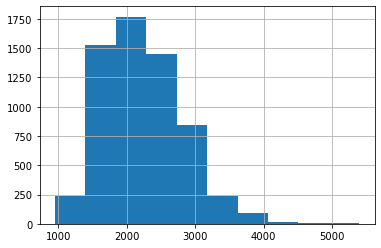

In [44]:
ComputerPrice['price'].hist()

In [45]:
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [46]:
ComputerPrice['speed'].value_counts()

66     2006
33     1987
50      992
25      560
100     516
75      122
Name: speed, dtype: int64

In [47]:
ComputerPrice.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

# Basic Data Exploration Results

Typically a categorical variable contains less than 20 Unique values

* **Price:** Continuous. **Target Variable**

* **Speed:** Categorical

* **hd:** Continuous

* **ram:** Categorical

* **screen:** Categorical

* **cd**: Categorical

* **multi:** Categorical

* **premium:** Categorical

* **ads:** Continuous

* **trend:** Continuous

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

**Categorical Predictors:** speed,ram,screen,cd,premium,multi

In [48]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotCat(InpData,ColsToPlot):
    
    #Generating multiple subplots
    fig,subplot=plt.subplots(nrows=1,ncols=len(ColsToPlot),figsize=(30,7))

    for ColName, PlotNum in zip(ColsToPlot,range(len(ColsToPlot))):
        InpData.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNum])

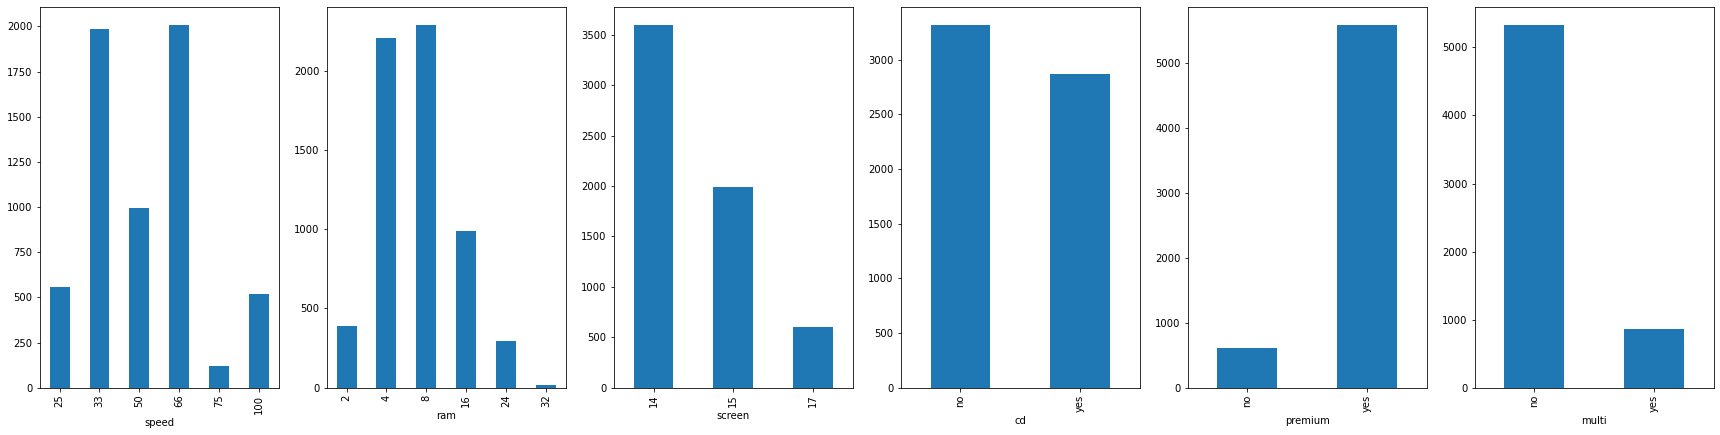

In [49]:
# Calling the function
PlotCat(InpData=ComputerPrice, ColsToPlot=['speed','ram','screen','cd','premium','multi'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'speed', 'ram', 'screen', 'cd', 'premium', 'multi'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, the continuous predictor variables are 'hd', 'ads', 'trend'

#ASk??
#def PlotCont(InpData,ColsToPlot):
    
    #Generating multiple subplots
    fig,subplot=plt.subplots(nrows=1,ncols=len(ColsToPlot),figsize=(30,7))
    fig.suptitle(str(ColsToPlot))
    for ColName, PlotNum in zip(ColsToPlot,range(len(ColsToPlot))):
        InpData.groupby(ColName).plot(kind='hist',ax=subplot[PlotNum])

array([[<AxesSubplot:title={'center':'hd'}>,
        <AxesSubplot:title={'center':'ads'}>],
       [<AxesSubplot:title={'center':'trend'}>, <AxesSubplot:>]],
      dtype=object)

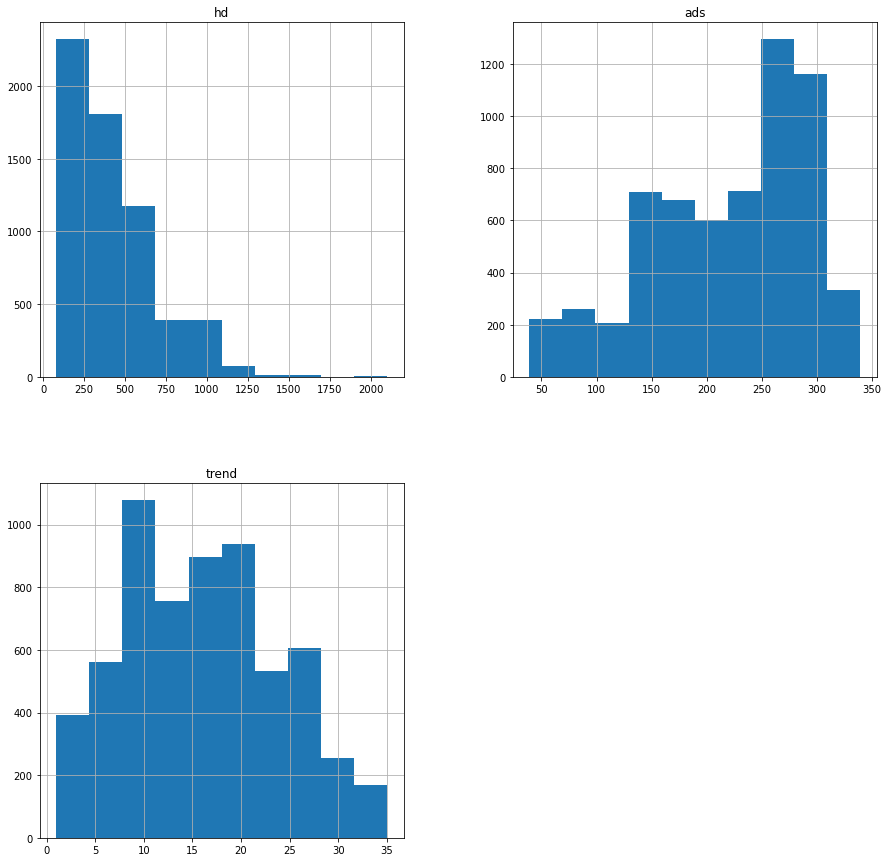

In [50]:
ComputerPrice.hist(['hd', 'ads', 'trend'],figsize=(15,15))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>hd</b> : Selected. Outliers are seen beyond 350.
* <b>ads</b>: Selected. 
* <b>trend</b>: Selected.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. 

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

In [51]:
# Counting the number of rows having outliers
len(ComputerPrice[ComputerPrice['hd']>=1600])

19

In [52]:
ComputerPrice['hd'][ComputerPrice['hd']<1600].sort_values(ascending=False)

2042    1370
900     1370
720     1370
1524    1370
1688    1370
        ... 
699       80
25        80
1413      80
79        80
0         80
Name: hd, Length: 6164, dtype: int64

In [53]:
ComputerPrice['hd'][ComputerPrice['hd']>1600]=1300

**Visualizing the distribution after outlier treatment**

<AxesSubplot:>

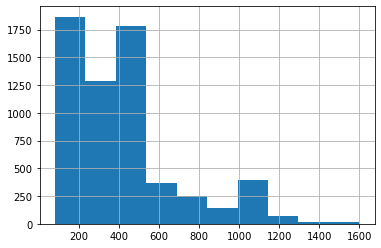

In [54]:
ComputerPrice['hd'].hist()

# Feature Selection (Bi-Variate analysis)
The best columns/features which are correlated to the Target Variable are estimated by measuring the correlation values or ANOVA/Chi-Square tests.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

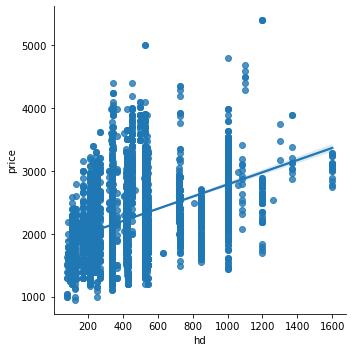

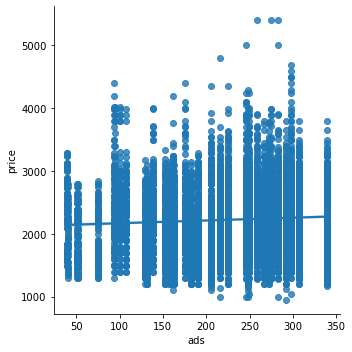

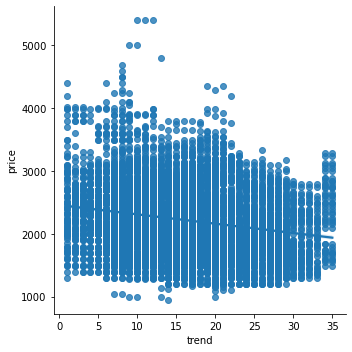

In [55]:
ContCols=['hd','ads','trend']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContCols:
    sns.lmplot(data=ComputerPrice,x=predictor,y='price')

# Scatter charts interpretation

See if there is a visible trend or not. There could be three scenarios:
1. Increasing Trend:
This means both variables are positively correlated.

2. Decreasing Trend:
This means both variables are negatively correlated. 

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.


# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Correlation between (-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1) means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>

**Calculating Correlation matrix**

In [56]:
Cols=['price','hd','ads','trend']
ComputerPrice[Cols].corr()

,price,hd,ads,trend
price,1.000000,0.428824,0.056434,-0.201662
hd,0.428824,1.000000,-0.325675,0.580700
ads,0.056434,-0.325675,1.000000,-0.320626
trend,-0.201662,0.580700,-0.320626,1.000000


**Final selected column:** hd, trend

# Relationship exploration: Categorical Vs Continuous -- Box Plots

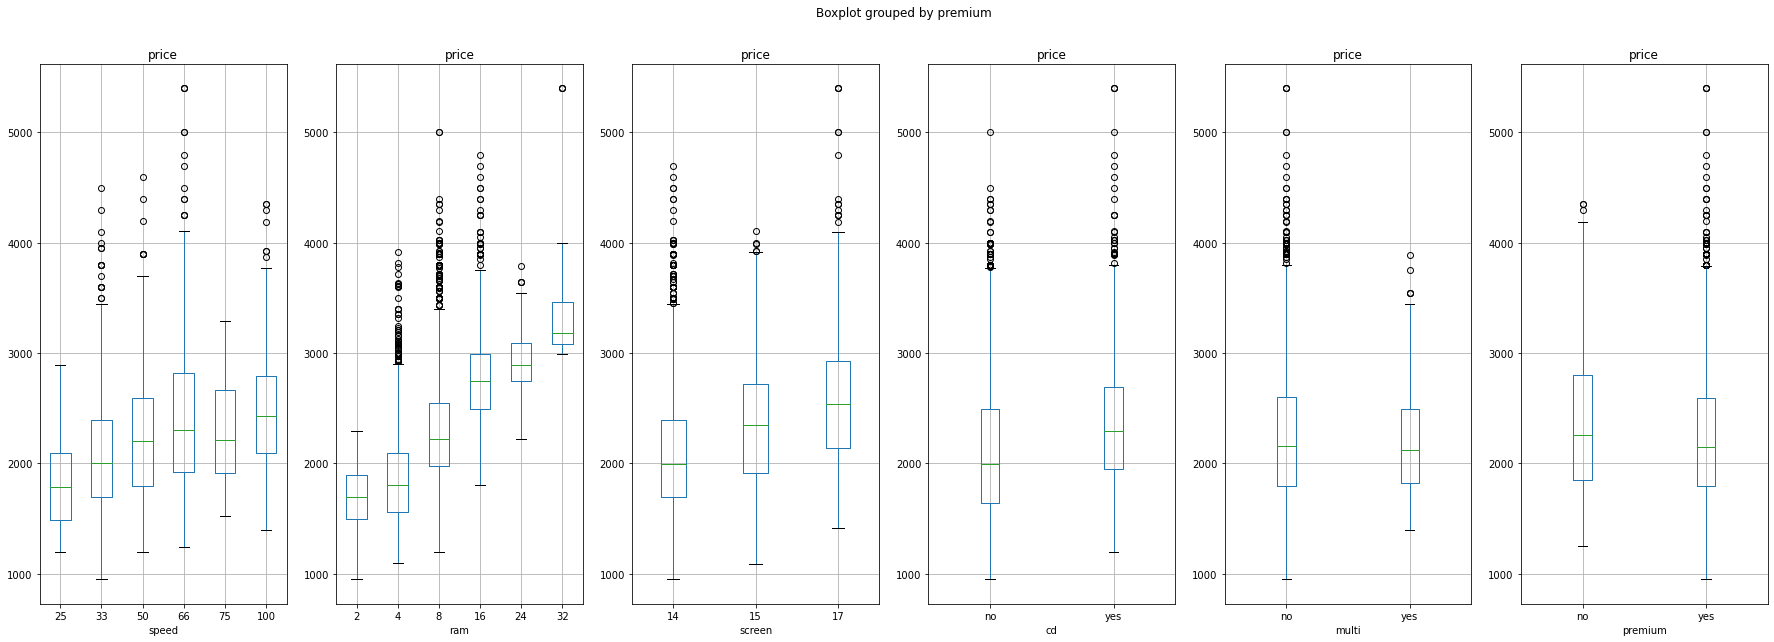

In [57]:
CatCols=['speed','ram','screen','cd','multi','premium']

fig,subplot=plt.subplots(nrows=1,ncols=len(CatCols),figsize=(30,10))

for PredCol,PlotNum in zip(CatCols, range(len(CatCols))):
    ComputerPrice.boxplot(column='price',by=PredCol,ax=subplot[PlotNum])


# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [58]:
from scipy.stats import f_oneway

In [59]:
# Defining a function to find the statistical relationship with all the categorical variables
def FuncAnova(InpData,TargetVariable,Predictors):
    
    # Creating an empty list of final selected predictors
    SelectedPreds=[]
    
    for Pred in Predictors:
        CatPredList=InpData.groupby(Pred)[TargetVariable].apply(list)
        Anova=f_oneway(*CatPredList) #unpacks the list
    
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if(Anova[1]<0.05):
            print(Pred,'is correlated with',TargetVariable,' | P-value:', Anova[1])
            SelectedPreds.append(Pred)
        else:
            print(Pred,'is NOT correlated with', TargetVariable,' | P-value:',Anova[1])
            
    return(SelectedPreds)

In [60]:
FuncAnova(InpData=ComputerPrice, TargetVariable='price',Predictors=CatCols)

speed is correlated with price  | P-value: 1.8447972027036634e-153
ram is correlated with price  | P-value: 0.0
screen is correlated with price  | P-value: 1.2830206408407136e-129
cd is correlated with price  | P-value: 8.113565801487017e-55
multi is NOT correlated with price  | P-value: 0.19076936432204794
premium is correlated with price  | P-value: 2.7969949437607514e-10


['speed', 'ram', 'screen', 'cd', 'premium']

**Final selected categorical columns:**  ['speed', 'ram', 'screen', 'cd', 'premium'] 

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [61]:
Predictors=['hd','trend','speed', 'ram', 'screen', 'cd', 'premium']

final_df=ComputerPrice[Predictors]
final_df.head()

,hd,trend,speed,ram,screen,cd,premium
0,80,1,25,4,14,no,yes
1,85,1,33,2,14,no,yes
2,170,1,25,4,15,no,yes
3,170,1,25,8,14,no,no
4,340,1,33,16,14,no,yes


## Data Pre-processing for Machine Learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. 

In this data there is no Ordinal categorical variable which is in string format.

In [62]:
final_df[['cd','premium']]=final_df[['cd','premium']].replace({'yes':1,'no':0})
final_df

,hd,trend,speed,ram,screen,cd,premium
0,80,1,25,4,14,0,1
1,85,1,33,2,14,0,1
2,170,1,25,4,15,0,1
3,170,1,25,8,14,0,0
4,340,1,33,16,14,0,1
...,...,...,...,...,...,...,...
6254,528,35,100,8,15,0,1
6255,850,35,66,16,15,1,1
6256,1200,35,100,24,15,1,1
6257,850,35,100,16,15,1,1


In [53]:
#Adding target variable to the data
final_df['price']=ComputerPrice['price']
final_df.head()

,hd,trend,speed,ram,screen,cd,premium,price
0,80,1,25,4,14,0,1,1499
1,85,1,33,2,14,0,1,1795
2,170,1,25,4,15,0,1,1595
3,170,1,25,8,14,0,0,1849
4,340,1,33,16,14,0,1,3295


# Machine Learning: Splitting the data into Training and Testing sample

In [54]:
x=final_df[Predictors]
y=final_df['price']

In [55]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Multiple Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [63]:
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 score:',metrics.r2_score(y_train,lm.predict(x_train)))

R2 score: 0.7634139074540116


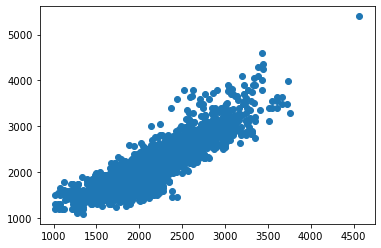

In [64]:
prediction=lm.predict(x_test)
plt.scatter(prediction,y_test)

In [68]:
mape=np.mean(abs((prediction-y_test)/y_test))*100
med=np.median(abs((prediction-y_test)/y_test))*100

print('mean accuracy on test data', 100-mape)
print('median accuracy on test data', 100-med)

mean accuracy on test data 90.32094398525511
median accuracy on test data 92.18030991915032


In [70]:
#Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    mape=np.mean(abs((orig-pred)/pred))*100
    return(100-mape)

#Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
cust_score=make_scorer(Accuracy_Score)

#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
print('Avg accuracy of model:',round(cross_val_score(lm,x,y,scoring=cust_score).mean(),2))

Avg accuracy of model: 88.89


# Decision Trees

In [72]:
from sklearn.tree import DecisionTreeRegressor
rm=DecisionTreeRegressor(max_depth=3,criterion='mse')
rm.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [73]:
# Measuring Goodness of fit in Training data
print('R2 score:',metrics.r2_score(y_train,rm.predict(x_train)))

R2 score: 0.5593113125859218


<AxesSubplot:>

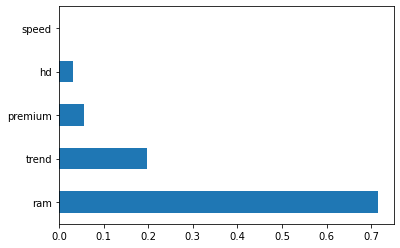

In [74]:
# Plotting the feature importance for Top 5 most important columns
pd.Series(rm.feature_importances_,index=Predictors).nlargest(5).plot(kind='barh')

In [79]:
prediction=rm.predict(x_test)

mape=np.mean(abs((prediction-y_test)/y_test)*100)
med=np.median(abs((prediction-y_test)/y_test)*100)

print('mean accuracy of the model:', 100-mape)
print('median accuracy of the model:', 100-med)
print('avg accuracy of the model:', round(cross_val_score(rm,x,y,scoring=cust_score).mean(),2))

mean accuracy of the model: 87.39437592678271
median accuracy of the model: 90.2410570243857
avg accuracy of the model: 82.59


### Plotting a Decision Tree

In [80]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\eshvi\\anaconda3\\Library\\bin\\graphviz'

In [81]:
from IPython.display import Image
from sklearn import tree
import pydotplus

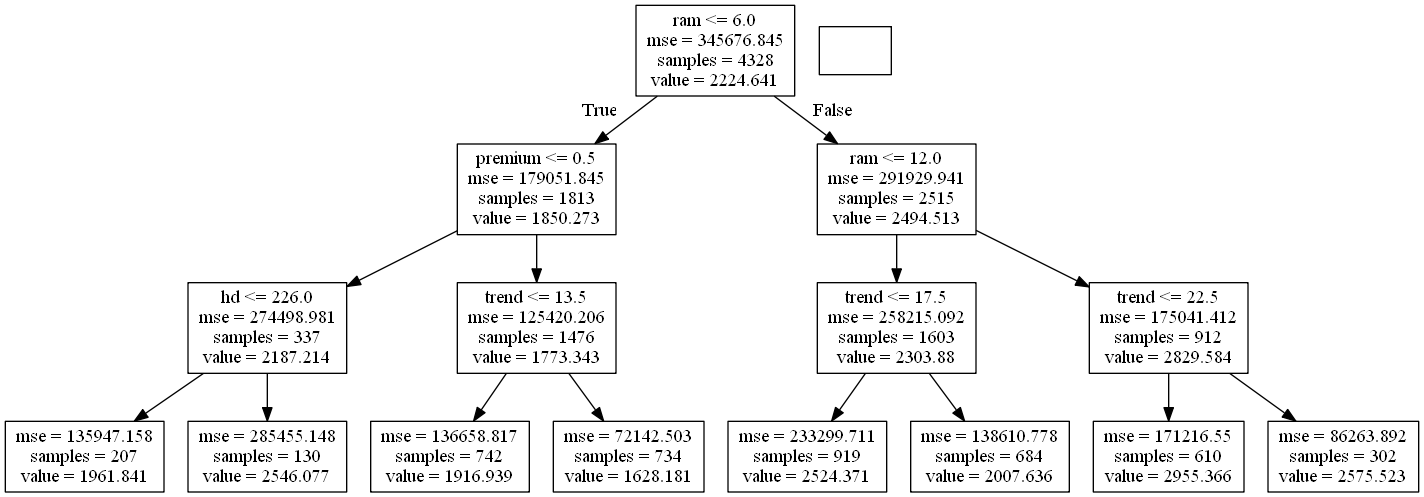

In [82]:
#Create DOT Data
dot_data=tree.export_graphviz(rm,feature_names=Predictors,class_names=y)

#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(), height=7000, width=7000)